In [2]:
import pandas as pd
import numpy as np
import math
import datetime
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3]:
data = pd.read_csv('marketing_customer_analysis.csv')

In [4]:
data.shape

(10910, 26)

In [5]:
data.head()

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [6]:
data = data.rename(columns={'EmploymentStatus':'Employment Status'})
data = data.rename(columns={'Gender	...':'Gender'})

In [7]:
data.head(2)

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,Employment Status,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN


In [9]:
data.dtypes

Unnamed: 0                         int64
Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
Employment Status                 object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim          float64
Months Since Policy Inception      int64
Number of Open Complaints        float64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size    

In [10]:
data.isnull().sum().sum()

9254

In [11]:
# count of null values in each column
print(data.isnull().sum())

Unnamed: 0                          0
Customer                            0
State                             631
Customer Lifetime Value             0
Response                          631
Coverage                            0
Education                           0
Effective To Date                   0
Employment Status                   0
Gender                              0
Income                              0
Location Code                       0
Marital Status                      0
Monthly Premium Auto                0
Months Since Last Claim           633
Months Since Policy Inception       0
Number of Open Complaints         633
Number of Policies                  0
Policy Type                         0
Policy                              0
Renew Offer Type                    0
Sales Channel                       0
Total Claim Amount                  0
Vehicle Class                     622
Vehicle Size                      622
Vehicle Type                     5482
dtype: int64

In [12]:
# using pandas info()
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     10910 non-null  int64  
 1   Customer                       10910 non-null  object 
 2   State                          10279 non-null  object 
 3   Customer Lifetime Value        10910 non-null  float64
 4   Response                       10279 non-null  object 
 5   Coverage                       10910 non-null  object 
 6   Education                      10910 non-null  object 
 7   Effective To Date              10910 non-null  object 
 8   Employment Status              10910 non-null  object 
 9   Gender                         10910 non-null  object 
 10  Income                         10910 non-null  int64  
 11  Location Code                  10910 non-null  object 
 12  Marital Status                 10910 non-null 

In [21]:
#drop NA values -- I decided to delete because the na values are on categorical columns(for example state)
#I could use the mode but if I drop the dataset will still be ok to analyse)

In [13]:
data2=data.dropna()

In [14]:
data2.head()

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,Employment Status,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
10,10,HG93801,Arizona,5154.764074,No,Extended,High School or Below,1/2/11,Employed,M,...,0.0,1,Corporate Auto,Corporate L3,Offer2,Branch,442.521087,SUV,Large,A
13,13,KR82385,California,5454.587929,No,Basic,Master,1/26/11,Employed,M,...,0.0,4,Personal Auto,Personal L3,Offer4,Call Center,331.200000,Two-Door Car,Medsize,A
16,16,FH51383,California,5326.677654,No,Basic,High School or Below,2/7/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer4,Call Center,300.528579,Two-Door Car,Large,A


In [15]:
data2.shape

(4543, 26)

In [16]:
data2['Effective To Date'] = pd.to_datetime(data2['Effective To Date'])

C:\Users\pbevi\AppData\Local\Temp\ipykernel_30896\1182554162.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Effective To Date'] = pd.to_datetime(data2['Effective To Date'])


In [27]:
data2['Effective To Date_month'] = data2['Effective To Date'].dt.month_name()

C:\Users\pbevi\AppData\Local\Temp\ipykernel_29044\1969216879.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Effective To Date_month'] = data2['Effective To Date'].dt.month_name()


In [18]:
data2.head()

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,Employment Status,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
10,10,HG93801,Arizona,5154.764074,No,Extended,High School or Below,2011-01-02,Employed,M,...,0.0,1,Corporate Auto,Corporate L3,Offer2,Branch,442.521087,SUV,Large,A
13,13,KR82385,California,5454.587929,No,Basic,Master,2011-01-26,Employed,M,...,0.0,4,Personal Auto,Personal L3,Offer4,Call Center,331.200000,Two-Door Car,Medsize,A
16,16,FH51383,California,5326.677654,No,Basic,High School or Below,2011-02-07,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer4,Call Center,300.528579,Two-Door Car,Large,A


In [19]:
#data2 [(data2 ['Effective To Date_month'].isin(['January','February','March']))]

In [20]:
display(data2)

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,Employment Status,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
10,10,HG93801,Arizona,5154.764074,No,Extended,High School or Below,2011-01-02,Employed,M,...,0.0,1,Corporate Auto,Corporate L3,Offer2,Branch,442.521087,SUV,Large,A
13,13,KR82385,California,5454.587929,No,Basic,Master,2011-01-26,Employed,M,...,0.0,4,Personal Auto,Personal L3,Offer4,Call Center,331.200000,Two-Door Car,Medsize,A
16,16,FH51383,California,5326.677654,No,Basic,High School or Below,2011-02-07,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer4,Call Center,300.528579,Two-Door Car,Large,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10902,10902,PP30874,California,3579.023825,No,Extended,High School or Below,2011-01-24,Employed,F,...,2.0,1,Personal Auto,Personal L2,Offer2,Agent,655.200000,Four-Door Car,Medsize,A
10903,10903,SU71163,Arizona,2771.663013,No,Basic,College,2011-01-07,Employed,M,...,4.0,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,A
10904,10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2011-02-24,Unemployed,M,...,0.0,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A


In [21]:
data2.shape

(4543, 26)

In [22]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4543 entries, 2 to 10908
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Unnamed: 0                     4543 non-null   int64         
 1   Customer                       4543 non-null   object        
 2   State                          4543 non-null   object        
 3   Customer Lifetime Value        4543 non-null   float64       
 4   Response                       4543 non-null   object        
 5   Coverage                       4543 non-null   object        
 6   Education                      4543 non-null   object        
 7   Effective To Date              4543 non-null   datetime64[ns]
 8   Employment Status              4543 non-null   object        
 9   Gender                         4543 non-null   object        
 10  Income                         4543 non-null   int64         
 11  Location Code   

In [23]:
data2.describe()

,Unnamed: 0,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,4543.000000,4543.000000,4543.000000,4543.000000,4543.000000,4543.000000,4543.000000,4543.000000,4543.000000
mean,5540.241250,8033.714059,37453.033238,93.773278,15.111820,48.153863,0.386309,2.980189,436.477525
std,3149.146534,6959.529443,30257.399536,35.093661,10.157925,28.146904,0.907553,2.390362,295.026990
min,2.000000,1904.000852,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,2884.000000,4039.089902,0.000000,69.000000,6.000000,24.000000,0.000000,1.000000,265.686145
50%,5549.000000,5846.520588,34455.000000,83.000000,14.000000,47.000000,0.000000,2.000000,384.000000
75%,8283.000000,8936.596938,61560.000000,110.000000,23.000000,72.000000,0.000000,4.000000,552.000000
max,10908.000000,83325.381190,99961.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
data2['Response'].value_counts()

No     3902
Yes     641
Name: Response, dtype: int64

In [29]:
dt2=data2['Response'].value_counts()
print(dt2)

No     3902
Yes     641
Name: Response, dtype: int64


In [30]:
dt2=data2['Response'].value_counts()/len(data2) *100
print(round(dt2,1))

No     85.9
Yes    14.1
Name: Response, dtype: float64


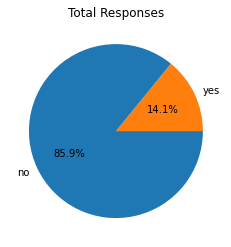

In [31]:
yes = len(data2[data2['Response']=='Yes'])
no  = len(data2) - yes

x = [yes, no]

labels = ['yes', 'no']
colors = ['tab:orange', 'tab:blue']

fig, ax = plt.subplots()
ax.pie(x, colors=colors, labels=labels, autopct='%.1f%%')
ax.set_title('Total Responses')

plt.show()

<AxesSubplot:>

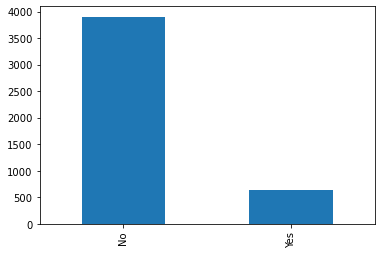

In [32]:
data2.Response.value_counts().plot(kind='bar')

In [33]:
import seaborn as sns

In [34]:
channel_list= print (data2 ['Sales Channel'].unique())

['Call Center' 'Branch' 'Agent' 'Web']


In [35]:
# value counts of each unique value
print(data2['Sales Channel'].value_counts())

Agent          1751
Branch         1246
Call Center     883
Web             663
Name: Sales Channel, dtype: int64


Text(0.5, 1.0, 'Responses by sales channel')

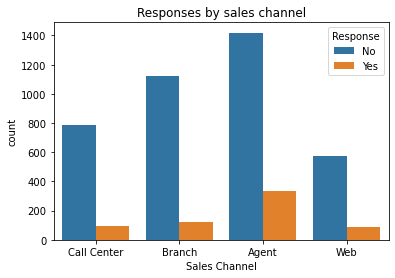

In [36]:
#Show a plot of the response rate by the sales channel.
sns.countplot(data=data2, x="Sales Channel", hue="Response").set_title('Responses by sales channel')

In [37]:
#Show a plot of the response rate by the total claim amount

In [38]:
data2.head()

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,Employment Status,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
10,10,HG93801,Arizona,5154.764074,No,Extended,High School or Below,2011-01-02,Employed,M,...,0.0,1,Corporate Auto,Corporate L3,Offer2,Branch,442.521087,SUV,Large,A
13,13,KR82385,California,5454.587929,No,Basic,Master,2011-01-26,Employed,M,...,0.0,4,Personal Auto,Personal L3,Offer4,Call Center,331.200000,Two-Door Car,Medsize,A
16,16,FH51383,California,5326.677654,No,Basic,High School or Below,2011-02-07,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer4,Call Center,300.528579,Two-Door Car,Large,A


In [39]:
dt3=data2[['Response','Total Claim Amount']]
print(dt3)

      Response  Total Claim Amount
2           No          480.000000
3          Yes          484.013411
10          No          442.521087
13          No          331.200000
16          No          300.528579
...        ...                 ...
10902       No          655.200000
10903       No          355.200000
10904       No          897.600000
10906       No          273.018929
10908       No          618.288849

[4543 rows x 2 columns]


In [40]:
# I tried to filter only yes to count only the yes but it didn´t work

<AxesSubplot:xlabel='Total Claim Amount'>

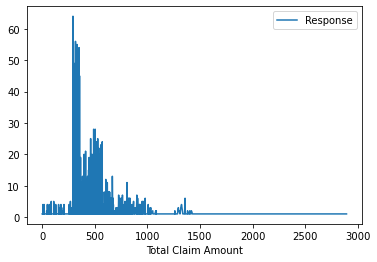

In [41]:
dt3.groupby('Total Claim Amount').count().plot()

In [42]:
dt4=data2[['Response','Income']]
print(dt4)

      Response  Income
2           No   22139
3          Yes   49078
10          No   82730
13          No   66334
16          No   76717
...        ...     ...
10902       No   28304
10903       No   59855
10904       No       0
10906       No   61146
10908       No   64195

[4543 rows x 2 columns]


In [43]:
#Show a plot of the response rate by income.

<AxesSubplot:xlabel='Income'>

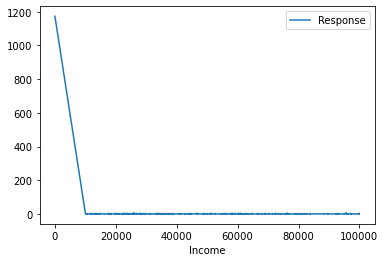

In [44]:
dt4.groupby('Income').count().plot()

In [45]:
#Starting Lab4

In [46]:
data2.dtypes

Unnamed: 0                                int64
Customer                                 object
State                                    object
Customer Lifetime Value                 float64
Response                                 object
Coverage                                 object
Education                                object
Effective To Date                datetime64[ns]
Employment Status                        object
Gender                                   object
Income                                    int64
Location Code                            object
Marital Status                           object
Monthly Premium Auto                      int64
Months Since Last Claim                 float64
Months Since Policy Inception             int64
Number of Open Complaints               float64
Number of Policies                        int64
Policy Type                              object
Policy                                   object
Renew Offer Type                        

In [47]:
numerical = data2.select_dtypes(np.number)
categorical = data2.select_dtypes(object)

display (numerical.head())
display (categorical.head())

,Unnamed: 0,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
2,2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
10,10,5154.764074,82730,127,13.0,31,0.0,1,442.521087
13,13,5454.587929,66334,69,25.0,25,0.0,4,331.200000
16,16,5326.677654,76717,66,26.0,10,0.0,6,300.528579


,Customer,State,Response,Coverage,Education,Employment Status,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Vehicle Type
2,LZ68649,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
10,HG93801,Arizona,No,Extended,High School or Below,Employed,M,Urban,Married,Corporate Auto,Corporate L3,Offer2,Branch,SUV,Large,A
13,KR82385,California,No,Basic,Master,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Two-Door Car,Medsize,A
16,FH51383,California,No,Basic,High School or Below,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer4,Call Center,Two-Door Car,Large,A


In [48]:
import matplotlib.pyplot as plt 

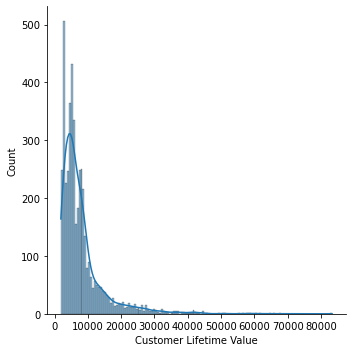

In [49]:
#fig, ax = plt.subplots(2, 1)
sns.displot(numerical['Customer Lifetime Value'], kde=True)

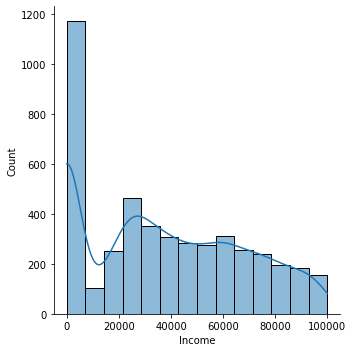

In [50]:
#fig, ax = plt.subplots(2, 1)
sns.displot(numerical['Income'], kde=True)

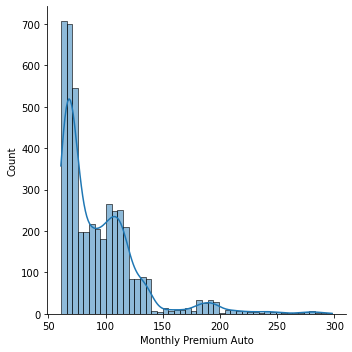

In [51]:
#fig, ax = plt.subplots(2, 1)
sns.displot(numerical['Monthly Premium Auto'], kde=True)

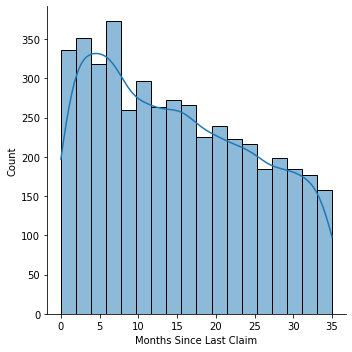

In [52]:
#fig, ax = plt.subplots(2, 1)
sns.displot(numerical['Months Since Last Claim'], kde=True)

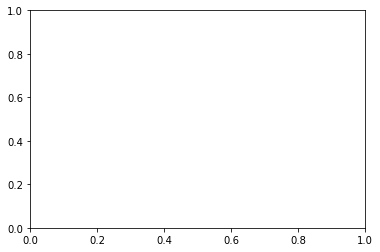

In [53]:
fig, ax = plt.subplots()

In [54]:
    
# x axis values 
x = ['Months Since Last Claim'] 
# corresponding y axis values 
y = [Count.'Months Since Last Claim'] 
    
# plotting the points  
plt.plot(x, y) 
    
# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 
    
# giving a title to my graph 
plt.title('My first graph!') 
    
# function to show the plot 
plt.show() 

SyntaxError: invalid syntax (1201560651.py, line 4)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

numerical.hist(column='Months Since Last Claim')
plt.title('Months Since Last Claim')

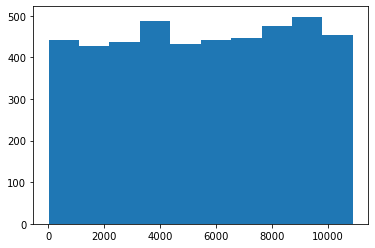

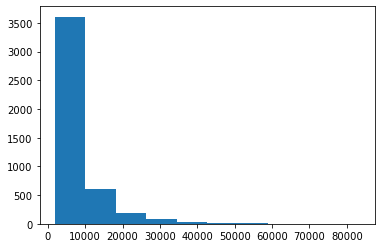

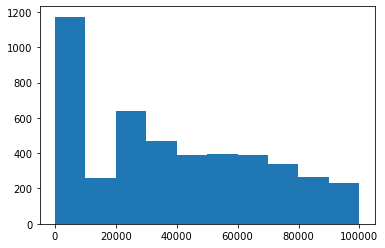

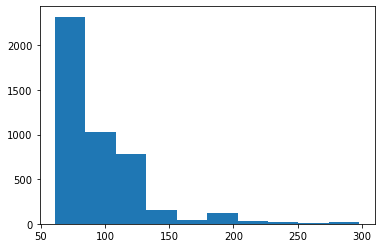

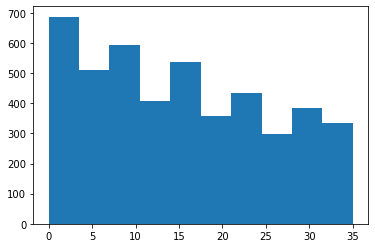

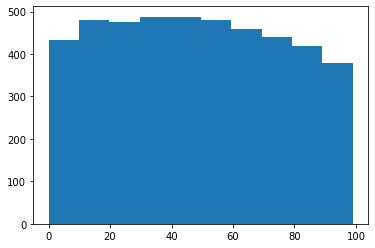

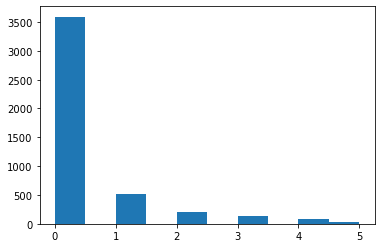

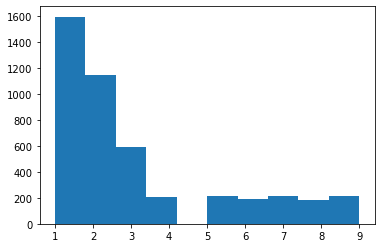

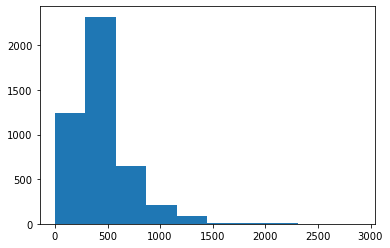

In [55]:
     
for column_name in numerical.columns:
    plt.hist(numerical[column_name])
    plt.show()
 

In [56]:
# Do the distributions for different numerical variables look like a normal distribution

In [57]:
data2.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,4543.0,5540.241250,3149.146534,2.000000,2884.000000,5549.000000,8283.000000,10908.000000
Customer Lifetime Value,4543.0,8033.714059,6959.529443,1904.000852,4039.089902,5846.520588,8936.596938,83325.381190
Income,4543.0,37453.033238,30257.399536,0.000000,0.000000,34455.000000,61560.000000,99961.000000
Monthly Premium Auto,4543.0,93.773278,35.093661,61.000000,69.000000,83.000000,110.000000,298.000000
Months Since Last Claim,4543.0,15.111820,10.157925,0.000000,6.000000,14.000000,23.000000,35.000000
Months Since Policy Inception,4543.0,48.153863,28.146904,0.000000,24.000000,47.000000,72.000000,99.000000
Number of Open Complaints,4543.0,0.386309,0.907553,0.000000,0.000000,0.000000,0.000000,5.000000
Number of Policies,4543.0,2.980189,2.390362,1.000000,1.000000,2.000000,4.000000,9.000000
Total Claim Amount,4543.0,436.477525,295.026990,0.099007,265.686145,384.000000,552.000000,2893.239678


In [58]:
#For the numerical variables, check the multicollinearity between the features. 
#Please note that we will use the column total_claim_amount later as the target variable.

In [59]:
numerical.corr()

,Unnamed: 0,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Unnamed: 0,1.000000,0.018506,0.002476,-0.002327,-0.012626,0.016022,-0.007972,-0.004518,-0.008315
Customer Lifetime Value,0.018506,1.000000,0.015914,0.413739,0.029199,0.022465,-0.034924,0.015397,0.228579
Income,0.002476,0.015914,1.000000,-0.007594,-0.010556,-0.007987,0.001149,-0.013199,-0.355311
Monthly Premium Auto,-0.002327,0.413739,-0.007594,1.000000,0.000890,0.033422,-0.002469,-0.025578,0.630894
Months Since Last Claim,-0.012626,0.029199,-0.010556,0.000890,1.000000,-0.036879,-0.000364,0.001089,-0.011449
Months Since Policy Inception,0.016022,0.022465,-0.007987,0.033422,-0.036879,1.000000,-0.001965,-0.009029,0.012610
Number of Open Complaints,-0.007972,-0.034924,0.001149,-0.002469,-0.000364,-0.001965,1.000000,0.014388,-0.003433
Number of Policies,-0.004518,0.015397,-0.013199,-0.025578,0.001089,-0.009029,0.014388,1.000000,0.002864
Total Claim Amount,-0.008315,0.228579,-0.355311,0.630894,-0.011449,0.012610,-0.003433,0.002864,1.000000


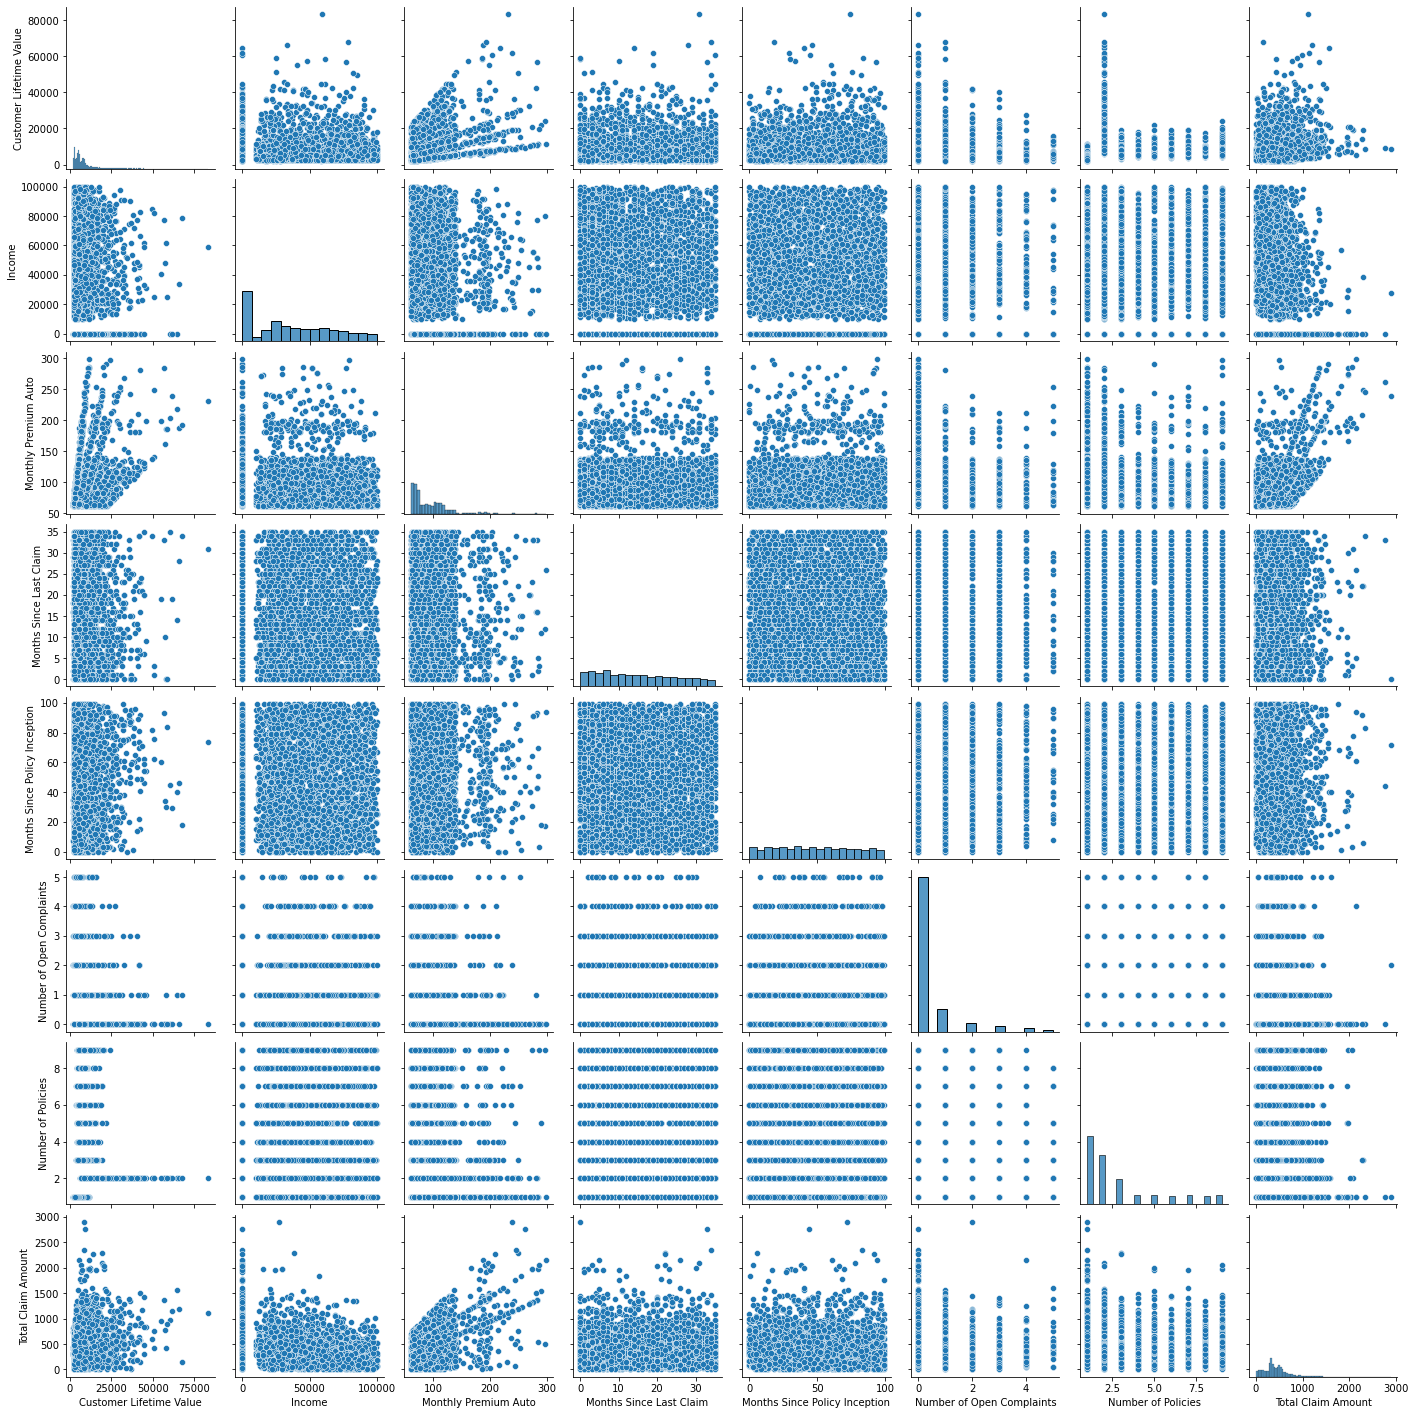

In [60]:
sns.pairplot(data2[['Customer Lifetime Value', 'Income', 'Monthly Premium Auto','Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints','Number of Policies','Total Claim Amount']])
plt.show()

In [61]:
#Drop one of the two features that show a high correlation between them (greater than 0.9). 
#Write code for both the correlation matrix and for seaborn heatmap. 
#If there is no pair of features that have a high correlation, then do not drop any features

In [62]:
correlations_matrix=numerical.corr()

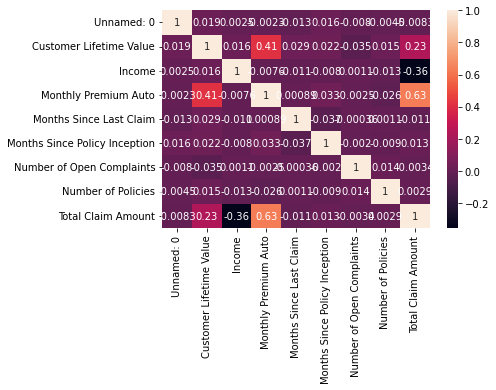

In [63]:
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [64]:
#(Further processing...)

# X-y split.
# Normalize (numerical).

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
# DO X-y split
 # Keep best correlated columns
X = numerical[['Monthly Premium Auto', 'Customer Lifetime Value', 'Income']]
y = numerical['Total Claim Amount']

In [67]:
X.describe()

,Monthly Premium Auto,Customer Lifetime Value,Income
count,4543.000000,4543.000000,4543.000000
mean,93.773278,8033.714059,37453.033238
std,35.093661,6959.529443,30257.399536
min,61.000000,1904.000852,0.000000
25%,69.000000,4039.089902,0.000000
50%,83.000000,5846.520588,34455.000000
75%,110.000000,8936.596938,61560.000000
max,298.000000,83325.381190,99961.000000


In [68]:
#Normalize
from sklearn.preprocessing import MinMaxScaler

minMaxScaler = MinMaxScaler()
minMaxScaler.fit(X)
X_normalized = minMaxScaler.transform(X)
X_num = pd.DataFrame(X_normalized, columns=X.columns)

In [69]:
X_num.describe()

,Monthly Premium Auto,Customer Lifetime Value,Income
count,4543.000000,4543.000000,4543.000000
mean,0.138284,0.075284,0.374676
std,0.148075,0.085475,0.302692
min,0.000000,0.000000,0.000000
25%,0.033755,0.026223,0.000000
50%,0.092827,0.048421,0.344684
75%,0.206751,0.086373,0.615840
max,1.000000,1.000000,1.000000


In [70]:
X_cat = categorical[['State','Response', 'Coverage', 'Education', 'Employment Status', 'Gender',
                    'Location Code', 'Marital Status', 'Policy Type', 'Policy','Renew Offer Type', 'Sales Channel',
                   'Vehicle Class','Vehicle Size','Vehicle Type']]

### Customer Analysis Round 6

In [71]:
#Processing Data

In [72]:
categorical = data2.select_dtypes(object)
categorical.head()

,Customer,State,Response,Coverage,Education,Employment Status,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Vehicle Type
2,LZ68649,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
10,HG93801,Arizona,No,Extended,High School or Below,Employed,M,Urban,Married,Corporate Auto,Corporate L3,Offer2,Branch,SUV,Large,A
13,KR82385,California,No,Basic,Master,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Two-Door Car,Medsize,A
16,FH51383,California,No,Basic,High School or Below,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer4,Call Center,Two-Door Car,Large,A


In [73]:
from sklearn.preprocessing import OneHotEncoder

In [74]:
encoder =  OneHotEncoder(drop = 'first').fit(X_cat)
X_cat_encoded = encoder.transform(X_cat).toarray() 
cols = encoder.get_feature_names_out(input_features=X_cat.columns)
X_cat_encoded = pd.DataFrame(X_cat_encoded, columns=cols)
X_cat_encoded.head()

,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,Education_High School or Below,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [75]:
X = pd.concat([X_cat_encoded, X_num], axis=1)
X

,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,Education_High School or Below,...,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small,Monthly Premium Auto,Customer Lifetime Value,Income
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.164557,0.160203,0.221476
1,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.151899,0.250898,0.490971
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.278481,0.039925,0.827623
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.033755,0.043608,0.663599
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.021097,0.042037,0.767469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4538,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.126582,0.020572,0.283150
4539,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.054852,0.010656,0.598784
4540,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.531646,0.212775,0.000000
4541,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.016878,0.041211,0.611699


### Linear Regression

In [76]:
#train test split:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=100)


In [114]:
X_train.head(3)

,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,Education_High School or Below,...,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small,Monthly Premium Auto,Customer Lifetime Value,Income
2698,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.156118,0.024646,0.587359
686,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.367089,0.409270,0.230400
3909,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.042194,0.045337,0.744830


In [77]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3634, 46)
(909, 46)
(3634,)
(909,)


In [78]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [108]:
y_pred_train = lm.predict(X_train)
r2_score(y_train, y_pred_train)

0.7691449520389855

In [80]:
y_pred_test = lm.predict(X_test)
r2_score(y_test, y_pred_test)

0.7753247438944412

In [82]:
# Computing the RMSE -> root mean squared error.


In [83]:
rmse=np.sqrt(mean_squared_error(y_test,y_pred_test))
rmse

138.85935133946487

In [84]:
mae = mean_absolute_error(y_test, y_pred_test)
print(mae)

94.94708474615899


In [85]:
mse = mean_squared_error(y_test,y_pred_test)
mse

19281.919454416944

In [86]:
r2_test = r2_score(y_test, y_pred_test)
r2_test

0.7753247438944412

In [95]:
# error metrics for y train
rmse=np.sqrt(mean_squared_error(y_train,y_pred_train))
print ('rmse',rmse)
mae = mean_absolute_error(y_train, y_pred_train)
print ('mae', mae)
mse = mean_squared_error(y_train,y_pred_train)
print ('mse', mse)
r2_train = r2_score(y_train, y_pred_train)
print ('r2_train', r2_train)

rmse 141.97926995503903
mae 97.89553541052729
mse 20158.11309696585
r2_train 0.7691449520389855


### Customer Analysis 7

In [ ]:
#Trying to improve applying standard scaler 

In [99]:
from sklearn.preprocessing import StandardScaler

Standardtransformer = StandardScaler().fit(numerical)
X_standardized = Standardtransformer.transform(numerical)
print(x_standardized.shape)
X_standardized = pd.DataFrame(X_standardized,columns=numerical.columns)
X_standardized.head()

(4543, 9)


,Unnamed: 0,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,-1.758842,0.993597,-0.506181,0.177451,1.859657,-0.609508,-0.425706,-0.410104,0.147537
1,-1.758524,2.054780,0.384245,0.091956,-0.503290,-1.604398,-0.425706,-0.410104,0.161142
2,-1.756301,-0.413716,1.496558,0.946905,-0.207922,-0.609508,-0.425706,-0.828497,0.020487
3,-1.755349,-0.370630,0.954614,-0.705997,0.973552,-0.822698,-0.425706,0.426681,-0.356880
4,-1.754396,-0.389011,1.297808,-0.791492,1.072008,-1.355675,-0.425706,1.263467,-0.460852


In [102]:
Xfinal = pd.concat([X_cat_encoded, X_standardized], axis=1)
Xfinal.head(3)

,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,Education_High School or Below,...,Vehicle Size_Small,Unnamed: 0,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-1.758842,0.993597,-0.506181,0.177451,1.859657,-0.609508,-0.425706,-0.410104,0.147537
1,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,-1.758524,2.054780,0.384245,0.091956,-0.503290,-1.604398,-0.425706,-0.410104,0.161142
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,-1.756301,-0.413716,1.496558,0.946905,-0.207922,-0.609508,-0.425706,-0.828497,0.020487


In [103]:
#train test split:
Xfinal_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=100)


In [113]:
Xfinal_train.head(3)

,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,Education_High School or Below,...,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small,Monthly Premium Auto,Customer Lifetime Value,Income
2698,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.156118,0.024646,0.587359
686,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.367089,0.409270,0.230400
3909,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.042194,0.045337,0.744830


In [110]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(Xfinal_train,y_train)

LinearRegression()

In [111]:
y_pred_train_ = lm.predict(Xfinal_train)
r2_score(y_train, y_pred_train)

0.7691449520389855

In [ ]:
# Same results

In [ ]:
#Trying to increase the test size for 0.3 to separate into 70/30 training and test

In [116]:
#train test split:
Xf_train, Xf_test, yf_train, yf_test = train_test_split(X,y,test_size=0.3, random_state=100)

In [117]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(Xf_train,yf_train)

LinearRegression()

In [118]:
yf_pred_train = lm.predict(Xf_train)
r2_score(yf_train, yf_pred_train)

0.7681070096807244

In [ ]:
# The performance decreased a bit